<h1>Sediment Transport Capacity Calculations</h1>

This notebook explains the theory and calculations to compare sediment transport capacity changes upstream and downstream of avulsion sites on fans, rather than deltas.

(This is not used in the GRL manuscript)

<h2>Read Slope and Width Data</h2>

In [1]:
""" This script calculates the sediment transport capacity drop from the upstream and downstream 
reaches a river, relative to a predefined avulsions site.

"""
__author__ = "Sam Brooke"
__email__ = "sbrooke@ucsb.edu"

import math
import pandas as pd
import numpy as np

D50_microns = 90
D50 = D50_microns/1000000

widths_df = pd.read_csv('avulsion_widths_seasonal.csv')
slopes_df = pd.read_csv('./elevation_data/avulsion_slope_details.csv')

# print(Hbf_trampush(slope))
print('Slope data: ')
print(slopes_df)
print('Width data: ')
print(widths_df)

rivers = slopes_df['river']

slope_width_data = {}

# Get ratios
for r in rivers:
    
    dat_out = {
        'width': {
            'upstream': {
                'value':False,
                'error':False
            },
            'downstream': {
                'value':False,
                'error':False
            }
        },
        'slope': {
            'upstream': {
                'value':False,
                'error':False,
                'pct_25':False,
                'pct_75':False
            },
            'downstream': {
                'value':False,
                'error':False,
                'pct_25':False,
                'pct_75':False
            }
        },
        'type': False
    }
    
    slope_dat = slopes_df.loc[slopes_df.river == r]
    slope_ratio = slope_dat.ratio
    
    avulsion_type = slope_dat.type
    dat_out['type'] = avulsion_type.iloc[0]
    
    dat_out['slope']['upstream']['value'] = float(slope_dat.upstream_slope)
    dat_out['slope']['upstream']['error']  = float(slope_dat.upstream_slope_std)
    dat_out['slope']['upstream']['pct_25']  = float(slope_dat.upstream_25)
    dat_out['slope']['upstream']['pct_75']  = float(slope_dat.upstream_75)
    dat_out['slope']['downstream']['value'] = float(slope_dat.downstream_slope)
    dat_out['slope']['downstream']['error'] = float(slope_dat.downstream_slope_std)
    dat_out['slope']['downstream']['pct_25']  = float(slope_dat.downstream_25)
    dat_out['slope']['downstream']['pct_75']  = float(slope_dat.downstream_75)
    
    width_dat = widths_df.loc[widths_df.river == r]
    
    dat_out['width']['upstream']['value'] = float(width_dat.loc[widths_df.location == 'upstream']['1'])
    dat_out['width']['downstream']['value'] = float(width_dat.loc[widths_df.location == 'downstream']['1'])
    dat_out['width']['upstream']['error'] = float(width_dat.loc[widths_df.location == 'upstream']['1_std'])
    dat_out['width']['downstream']['error'] = float(width_dat.loc[widths_df.location == 'downstream']['1_std'])
    
    slope_width_data[r] = dat_out


Slope data: 
     id       river    type  reach    distance       lat_utm        lon_utm  \
0  AV24     mangoky   delta      0   55754.555  7.596931e+06  374788.988194   
1  AV11   betsiboka  inland      0  169137.705  8.137424e+06  707692.366180   
2   AV9   mahajamba  inland      0  198778.527  8.183133e+06  755982.410861   
3  AV18   manambolo   delta      0   22648.716  7.878651e+06  442901.509501   
4  AV21   morondava   delta      0   38213.480  7.750536e+06  449619.596896   
5  AV15      sambao   delta      0   30454.987  8.164712e+06  459511.774436   
6  AV26  fiherenana   delta      0    5238.988  7.421996e+06  362960.240350   

   elev  upstream_slope  downstream_slope  upstream_slope_std  upstream_25  \
0     1        0.000713          0.000726            0.000210     0.000698   
1     1        0.003622          0.001242            0.007135     0.002389   
2     1        0.003383          0.001044            0.003188     0.002940   
3     1        0.000743          0.000391 

<h2> Width-Depth and Discharge Ratios</h2>

The volume of water discharge ($Q$, $m^3s^{-1}$) is conserved between upstream (1) and downstream (2),

\begin{equation}
Q = U_1 W_1 H_1 = U_2 W_2 H_2
\end{equation}

where $U$ is velocity ($ms^{-1}$), $W$ is channel width ($m$) and $H$ is channel depth ($m$).

The ratio of unit discharges ($qw$),  discharge per unit width, ($m^2s^{-1}$) can be written:

\begin{equation}
\frac{W_2}{W_1} = \frac{U_1 H_1}{U_2 H_2} = \frac{qw_1}{qw_2}
\end{equation}

<h2>Sediment Transport Capacity</h2>

\begin{equation}
Qsc = Wqs
\end{equation}

<h3>Manning-Strickler</h3>

Equation for flow depth ($H$):

\begin{equation}
H = \left [ \frac{C_{f}qw^2}{gS} \right ]^{1/3}
\end{equation}

where $R$ is the submerged specific gravity, $C_{f}$ is the coefficient of bed friction, $g$ is gravitational acceleration and $S$ is slope.

$R$ can also be expressed by:
\begin{equation}
R = \frac{\rho_s - \rho_f}{\rho_f}
\end{equation}

<h3>Sediment Transport</h3>

Using the <a href="https://advances.sciencemag.org/content/3/5/e1603114?intcmp=trendmd-adv">Ma et al. [2017]</a> relation:

\begin{equation}
    qs = qs^*\sqrt{R_gD_{50}^3}
\end{equation}

where
    
\begin{equation}
    qs^* = \frac{\alpha\tau^{*n}}{C_f}
\end{equation}
    
where $\alpha$ and $n$ are constants depended on grain size ($D$):

\begin{equation}
\alpha(D) = \frac{0.859}{1+exp[10^5(D-1.6 \times 10^{-4})]}+0.036
\end{equation}

\begin{equation}
n(D) = \frac{1.322}{1+exp[10^5(-D + 1.6 \times 10^{-4})]}+1.678
\end{equation}

<h3>Rearrange for Flow Depth</h3>
    
Assuming the depth-slope product and the Shields criterion:

\begin{equation}
\tau_b = \rho_f gHS
\end{equation}

\begin{equation}
\tau^* = \frac{\tau_b}{(\rho_s - \rho_f) g D_{50}}
\end{equation}

\begin{equation}
\tau^* = \frac{HS}{R D_{50}}
\end{equation}

We can then substitute equation (6) and (12) into (7) to express sediment flux ($qs$) as:

\begin{equation}
qs = \frac{\alpha}{C_{f}} \left ( \frac{HS}{RD_{50}} \right )^n (Rg D_{50}^3)^{\frac{1}{2}}
\end{equation}

Assuming that $C_{f}$, $R$ and $D_{50}$ do not change from upstream to downstream, we can write sediment transport capacity ($Qsc$) as:

\begin{equation}
    Qsc = W (HS)^n
\end{equation}

And for the ratios:

\begin{equation}
    \frac{Qsc_1}{Qsc_2} = \frac{W_1}{W_2} \left ( \frac{S_1}{S_2} \right )^n \left ( \frac{H_1}{H_2} \right )^n
\end{equation}

Where $H$ can be subtituted using Manning-Stricker (4):

\begin{equation}
\frac{H_1}{H_2} = \left ( \frac{S_2}{S_1} \right )^{\frac{1}{3}} \left ( \frac{qw_1}{qw_2} \right )^{\frac{2}{3}}
\end{equation}

\begin{equation}
\frac{H_1}{H_2} = \left ( \frac{S_2}{S_1} \right )^{\frac{1}{3}} \left ( \frac{W_2}{W_1} \right )^{\frac{2}{3}}
\end{equation}

<h3>Sediment Transport Capacity Ratio</h3>

\begin{equation}
    \frac{Qsc_1}{Qsc_2} = \frac{W_1}{W_2} \left ( \frac{S_1}{S_2} \right )^n \left ( \frac{S_2}{S_1} \right )^{\frac{n}{3}} \left ( \frac{W_2}{W_1} \right )^{\frac{2n}{3}}
\end{equation}

\begin{equation}
    \frac{Qsc_1}{Qsc_2} = \frac{W_1}{W_2}^{\frac{1-2n}{3}} \left ( \frac{S_1}{S_2} \right )^{\frac{2n}{3}}
\end{equation}


<h2>Monte Carlo Simulations for Qsc</h2>

Use the standard error of widths and slopes to constrain error of ratios.


n = 1.6792044096789975

1.119469606452665
-0.7861362731193317
mangoky
Upstream slope: 0.0007132334263617162
IQR upstream: 6.960971866919462e-05
Downstream slope: 0.0007260308009086336
IQR downstream: 7.519482622241812e-05


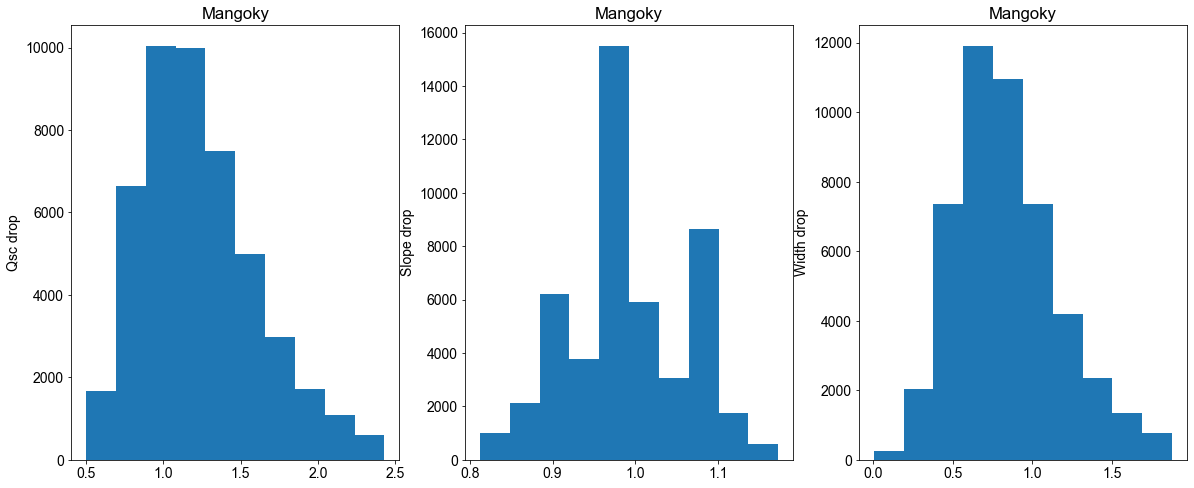

betsiboka
Upstream slope: 0.003622293188649182
IQR upstream: 0.002006424733694124
Downstream slope: 0.0012420119195377366
IQR downstream: 0.0002575353796024078


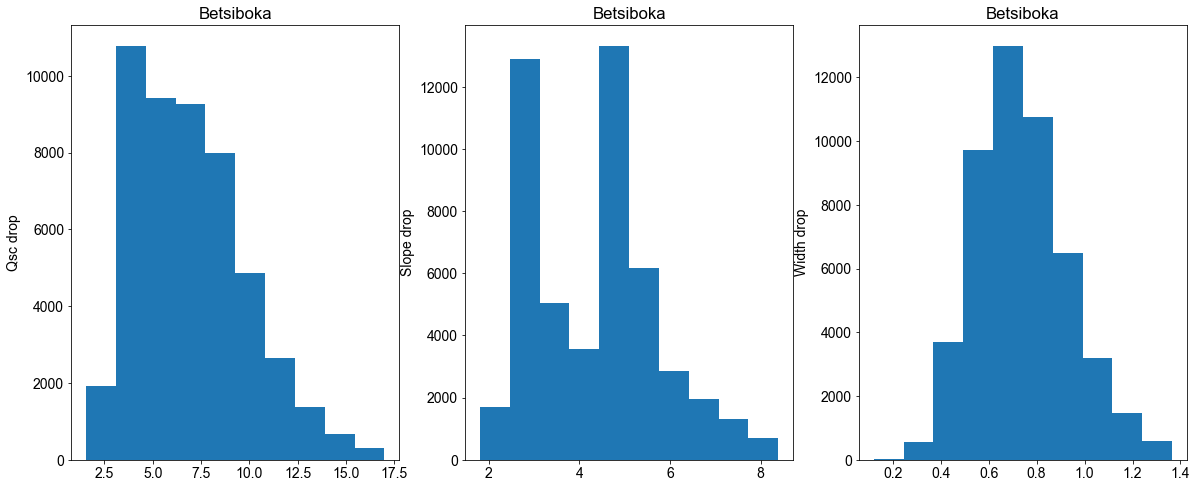

mahajamba
Upstream slope: 0.0033832858655957515
IQR upstream: 0.0026236821896254443
Downstream slope: 0.001044341322963279
IQR downstream: 0.00031606258371428474


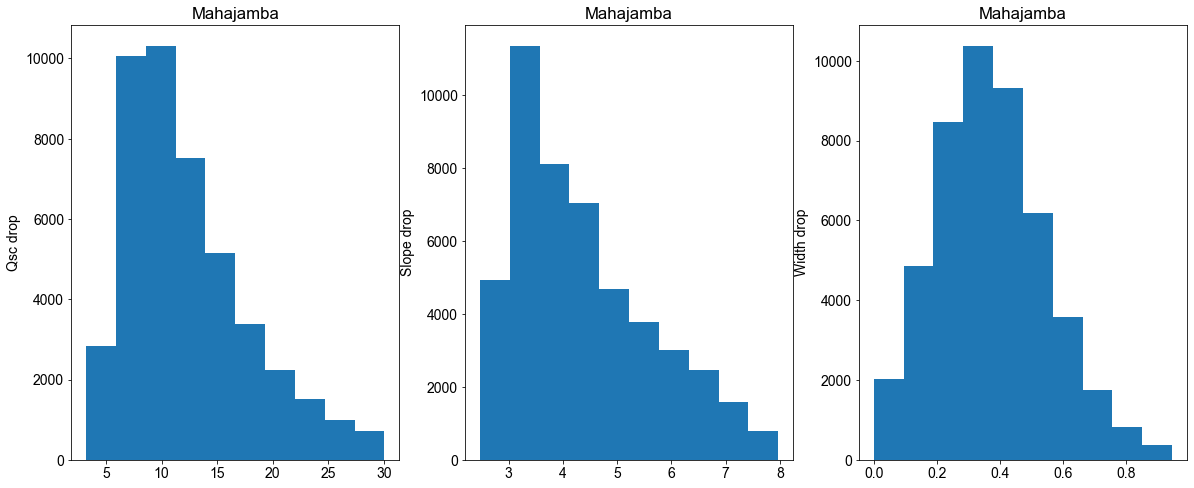

manambolo
Upstream slope: 0.000743287241385703
IQR upstream: 0.00020367481560596665
Downstream slope: 0.00039125356068710963
IQR downstream: 0.00013729490387197612


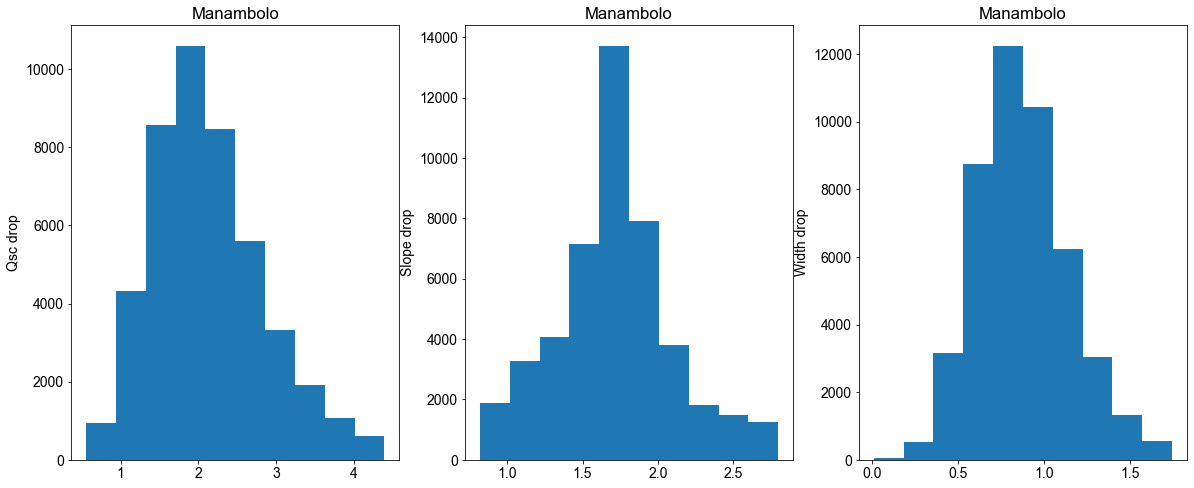

morondava
Upstream slope: 0.001437196658331496
IQR upstream: 0.0001257418734905315
Downstream slope: 0.0009111763007885012
IQR downstream: 0.0004484020942456573


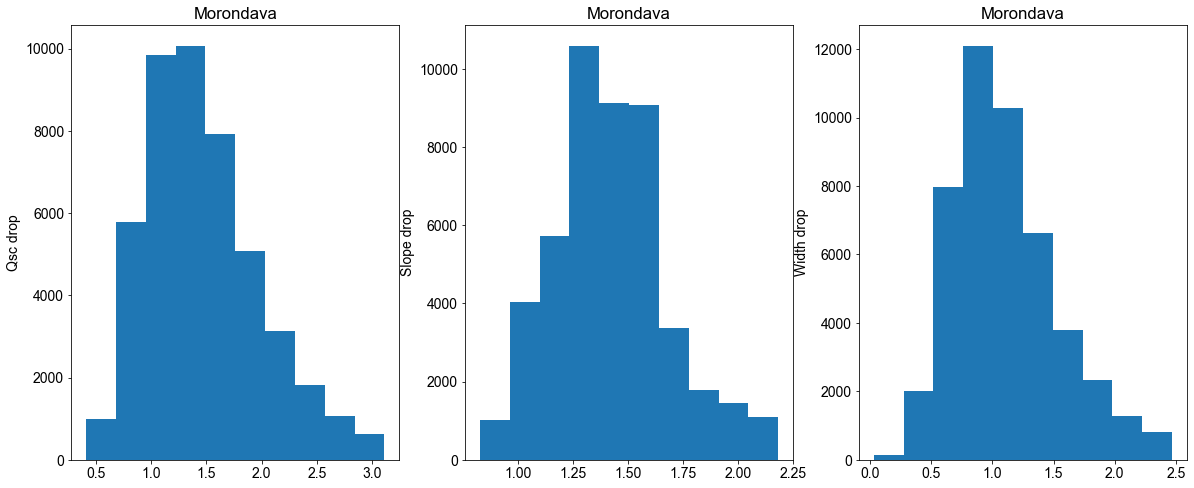

sambao
Upstream slope: 0.0005205067741575783
IQR upstream: 8.273044890366209e-05
Downstream slope: 0.00020358664429488452
IQR downstream: 0.00016350317218508166


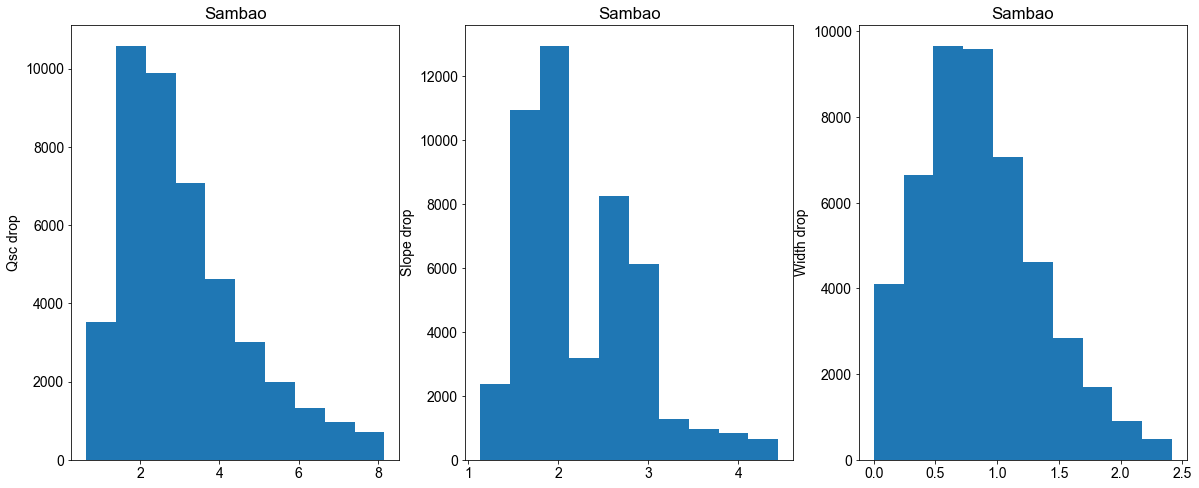

fiherenana
Upstream slope: 0.002487446620491798
IQR upstream: 0.0003950028743200379
Downstream slope: 0.0014278880793018565
IQR downstream: 0.00018475649644112573


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

font = {'family' : 'arial',
        'size'   : 14}

mpl.rc('font', **font)

def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return s<m

num_reps = 50000

# Equation (9)
# Ma et al. [2017] n exponent
n = (1.322 / (1 + math.exp(math.pow(10,5) * ((-1 * D50) + (1.6 * math.pow(10, -4))  )))) + 1.678

print('n = '+str(n))
print('')

width_exponent = (1-(2*n))/3
slope_exponent = (2*n)/3

print(slope_exponent)
print(width_exponent)

fan_type = {}
fan_data = {}
fan_data_error = {}

# Dataframe columns
width = []
width_error = [] 
slope = []
slope_error = [] 
qsc = []
qsc_error = [] 
av_types = []

for r in rivers:
    
    dat = slope_width_data[r]
    
    Wu = np.random.normal(dat['width']['upstream']['value'], dat['width']['upstream']['error'], num_reps)
    Wd = np.random.normal(dat['width']['downstream']['value'], dat['width']['downstream']['error'], num_reps)
    Wu[Wu<=0] = np.nanmean(Wu)
    Wd[Wd<=0] = np.nanmean(Wd)
    
    Su = np.random.normal(dat['slope']['upstream']['value'], dat['slope']['upstream']['error'], num_reps)
    Sd = np.random.normal(dat['slope']['downstream']['value'], dat['slope']['downstream']['error'], num_reps)    
    Su[Su<=0] = np.nanmean(Su)
    Sd[Sd<=0] = np.nanmean(Sd)
    
    # Remove data outside of the IQR
    Su[Su<dat['slope']['upstream']['pct_25']] = np.nanmean(Su)
    Su[Su>dat['slope']['upstream']['pct_75']] = np.nanmean(Su)
    Sd[Sd<dat['slope']['downstream']['pct_25']] = np.nanmean(Sd)
    Sd[Sd>dat['slope']['downstream']['pct_75']] = np.nanmean(Sd)
            
    print(r)
    print('Upstream slope: '+str(dat['slope']['upstream']['value']))
    print('IQR upstream: '+str((dat['slope']['upstream']['pct_75']-dat['slope']['upstream']['pct_25'])/2))
   
    print('Downstream slope: '+str(dat['slope']['downstream']['value']))
    print('IQR downstream: '+str((dat['slope']['downstream']['pct_75']-dat['slope']['downstream']['pct_25'])/2))
        
    
    # Compute ratios
    
    s_ratio = Su/Sd
    w_ratio = Wu/Wd
    bool_outlier_w = reject_outliers(w_ratio, m=5)
    bool_outlier_s = reject_outliers(s_ratio, m=5)
    
    bool_outlier_w[bool_outlier_s == False] = False
    bool_outlier = bool_outlier_w
    w_ratio = w_ratio[bool_outlier==True]
    s_ratio = s_ratio[bool_outlier==True] 
    
    Qsc = np.power(w_ratio, width_exponent) * np.power(s_ratio, slope_exponent)
    bool_outlier = reject_outliers(Qsc, m=5)
    Qsc = Qsc[bool_outlier==True]
    
    fan_type[r] = dat['type']
    fan_data[r] = [np.mean(Qsc), np.mean(w_ratio), np.mean(s_ratio)]
    fan_data_error[r] = [np.std(Qsc), np.std(w_ratio), np.std(s_ratio)]

    width.append(np.mean(w_ratio))
    width_error.append(np.std(w_ratio))
    slope.append(np.mean(s_ratio))
    slope_error.append(np.std(s_ratio))
    qsc.append(np.mean(Qsc))
    qsc_error.append(np.std(Qsc))
    av_types.append(dat['type'])

    fig, axes = plt.subplots(1, 3, figsize=(20, 8))

    axes[0].hist(Qsc)
    axes[0].set_title(r.capitalize())
    axes[0].set_ylabel('Qsc drop')
    
    axes[1].hist(s_ratio)
    axes[1].set_title(r.capitalize())
    axes[1].set_ylabel('Slope drop')

    axes[2].hist(w_ratio)
    axes[2].set_title(r.capitalize())
    axes[2].set_ylabel('Width drop')
    plt.show()
    
ratio_df = pd.DataFrame({
    "river":rivers,
    "type":av_types,
    "width_drop": width,
    "width_drop_error": width_error,
    "slope_drop": slope,
    "slope_drop_error": slope_error,
    "qsc_drop": qsc,
    "qsc_drop_error": qsc_error,
})

ratio_df.to_csv('qsc_drop_ratios.csv')

<h2>Plotting</h2>

In [3]:
fig, ax = plt.subplots(figsize=(5, 6))

bar_width = 0.4


xlabels = ['Slope change', "Max. flooding\n width", "$Q_{sc}$"]
xticks = np.array(range(0, len(xlabels)))

abbreviations = ['BE', 'BE', 'BE', 'MH', 'MH', 'MH']

ax.axhline(1, linestyle='--', color='k')


greyscale = False

for k, r in enumerate(rivers):
    row = ratio_df.loc[ratio_df.river == r]
    if str(next(iter(row.type))) == 'inland':
        
        if greyscale == True:
            if r == 'betsiboka':
                c = 'darkgrey'
            else:
                c = 'whitesmoke'                
        else:
            if r == 'betsiboka':
                c = 'lightgreen'
            else:
                c = 'plum'
            
        
        b1 = ax.bar(xticks+(bar_width*k), [float(row.slope_drop), float(row.width_drop), float(row.qsc_drop)],
                width=bar_width, color=c, linewidth=1.5, edgecolor='k', error_kw=dict(lw=1, capsize=5, capthick=1),
                    yerr = [float(row.slope_drop_error), float(row.width_drop_error), float(row.qsc_drop_error)],
                   label=r.capitalize())



ax.set_xticks(xticks + (bar_width / 2) + bar_width)
ax.set_xticklabels(xlabels)
ax.legend(loc='upper left')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for k, rect in enumerate(rects):
        height = rect.get_height()
        if k < len(abbreviations):
            ax.annotate(abbreviations[k],
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xycoords='data', size=26,
                        xytext=(10, 120), textcoords='offset points',
                        arrowprops=dict(arrowstyle="-"))

# bars = [rect for rect in ax.get_children() if isinstance(rect, mpl.patches.Rectangle)]

ax.set_ylabel('Ratio of upstream to downstream value [-]')
ax.set_ylim(bottom=.1, top=100)
ax.get_yaxis().get_major_formatter().labelOnlyBase = False
plt.grid(False)
plt.yscale("log")
fig.savefig('figures/QS_ratios.pdf', transparent=True)
# autolabel(bars)

